Analysing GPT Text


In [2]:
# Import Modules

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")



/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332718 sha256=287fd167c14b9ee1a592e47259ea7af20a08e9f622ca43ddbf6bebc4c5907658
  Stored in directory: 

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob

from pattern.en import sentiment

In [5]:
# Use request package to make a GET request for the website.

req =requests.get('https://www.forbes.com/sites/bruceweinstein/2023/02/24/why-smart-leaders-use-chatgpt-ethically-and-how-they-do-it/?sh=33910cf4361b')


In [6]:
# using the correct encoding of html page

req.encoding = 'utf-8'

In [7]:
# Extract the html
html = req.text

In [8]:
# Printing the first 100 characters in html
print(html[:1000])

<!DOCTYPE html><html lang="en"><head><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-bold-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/work-sans/worksans-regular-webfont.woff2" type="font/woff2" crossorigin><script>window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;</script><script type="text/javascript" async src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async src="//imasdk.googleapis.com/js/sdkloader/ima3.js"></script><script type="text/javascript" async src="https://www.gstatic.com/readaloud/forbes/player/web/api/js/api.js"></script><title>Why Smart Leaders Use ChatGPT Ethically And How They Do It</title><meta charset="utf-8"><meta http-equiv="Content-Language" content="en_US"><link rel="shortcut icon" href="https://i.forbesimg.com/48X48-F.png"><meta name="referrer" content="no-referrer-

In [9]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html)

In [10]:
# Get the text out of the soup
text = soup.get_text()

In [11]:
len(text)

12721

In [12]:
# See some text

print(text[:2000])

Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkey's Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customized 

In [13]:
# Entire text

text

"Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkey's Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customi

In [14]:
clean_text= text.replace("\n", " ")

In [15]:
clean_text= clean_text.replace("/", " ")       

In [16]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [17]:
clean_text

'Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customiz

In [18]:
# Get the sentences

sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [19]:
sentence

['Why Smart Leaders Use ChatGPT',
 'Ethically',
 'And How They Do ItSubscribe Sign InBETAThis is a BETA experience.',
 'You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am',
 'EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28,',
 '2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN:',
 'The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership',
 'StrategyWhy Smart Leaders Use ChatGPT',
 'Ethically',
 'And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbe

In [20]:
print(len(sentence))

144


In [21]:
print(sentence[0])

Why Smart Leaders Use ChatGPT


In [22]:
# Using TextBlob
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])


In [23]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [24]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      144 non-null    object 
 1   Polarity      144 non-null    float64
 2   Subjectivity  144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [25]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Why Smart Leaders Use ChatGPT,0.214286,0.642857
1,Ethically,0.200000,0.600000
2,And How They Do ItSubscribe Sign InBETAThis is...,0.000000,0.000000
3,You may opt-out by clicking hereMore From Forb...,0.000000,0.000000
4,EDTWhy Working From Home Is Here To StayMar 28...,0.500000,0.500000


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

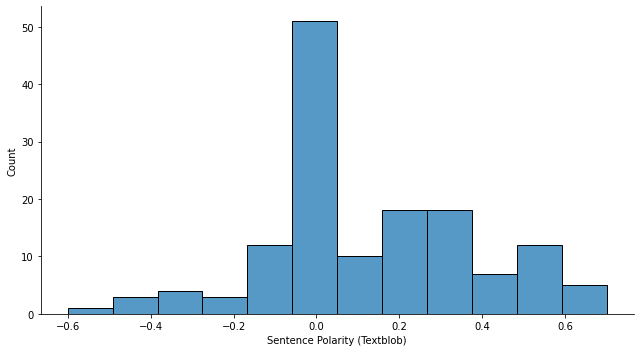

In [26]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

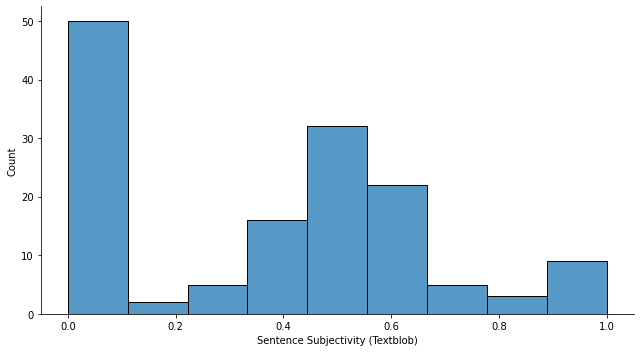

In [27]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [30]:
# Word cloud

clean_text[100:800]

'ence. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit'

In [31]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [32]:
len(tokens)

2431

In [33]:
print(tokens[0:50])

Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce,


In [34]:
# for lower case uniformity
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

TypeError: ignored

In [35]:
len(words)

0

In [36]:
print(words[0:10])

[]


In [37]:
#A new list to hold Moby Dick with No Stop words
words_new = []

#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [38]:
len(words_new)

0

In [39]:
print(words_new[0:10])

[]


In [40]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

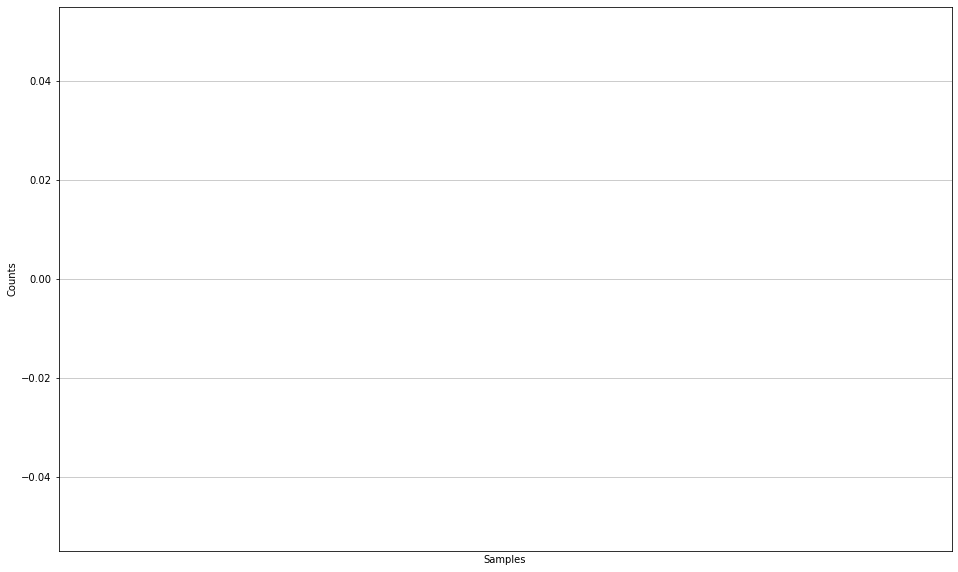

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [42]:
#converting into string

res=' '.join([i for i in words_new if not i.isdigit()]) 

ValueError: ignored

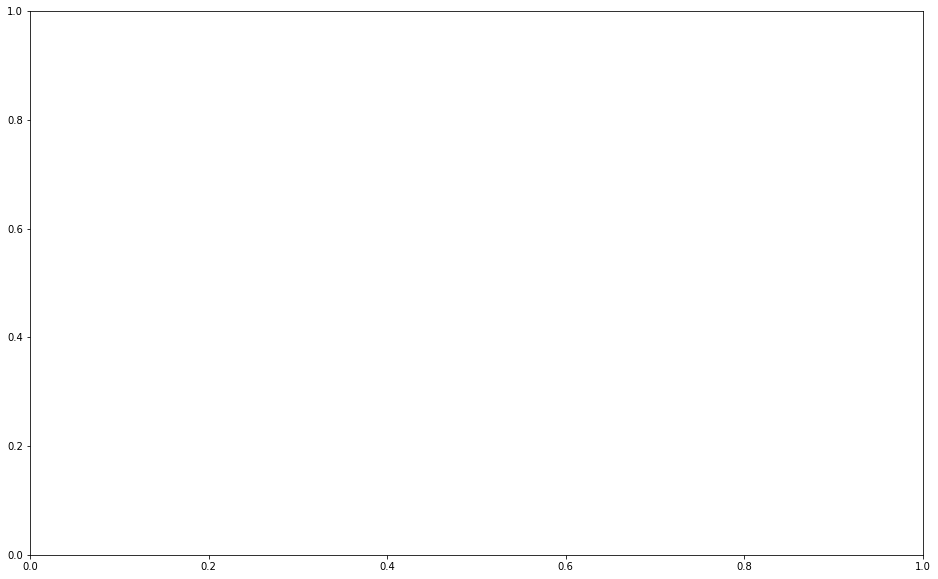

In [43]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

In [29]:
# Patterns Sentiment Analysis

pattern_sentiment=[]
​
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    
    pattern_sentiment.append([s,c,d])
    

SyntaxError: ignored

In [ ]:
# Load dataset
tweets_df = pd.read_csv("Tweets.csv")
tweets_df.head(20)

# tweets_df2 = pd.read_csv("tweets2.csv")
# tweets_df2.head()

In [ ]:
# Get info

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
# Converting strings to int
tweets_df_ = {'sentiment': ['negative', 'neutral', 'positive'], 
              'SENTIMENTS': ['1', '2', '3']}
tweets_df_


{'sentiment': ['negative', 'neutral', 'positive'],
 'SENTIMENTS': ['1', '2', '3']}

In [ ]:
tweets_df['sentiment'] = pd.to_numeric(tweets_df['sentiment'])

ValueError: ignored

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))